1)  Please evaluate confusion matrix for your classification problem. From confusion matrix, the
other performance metrics such as precision, recall and F1-Score measures for both training and test
data. Based on your observations, infer the models learning outcome (underfit / regularfit / overfit).  

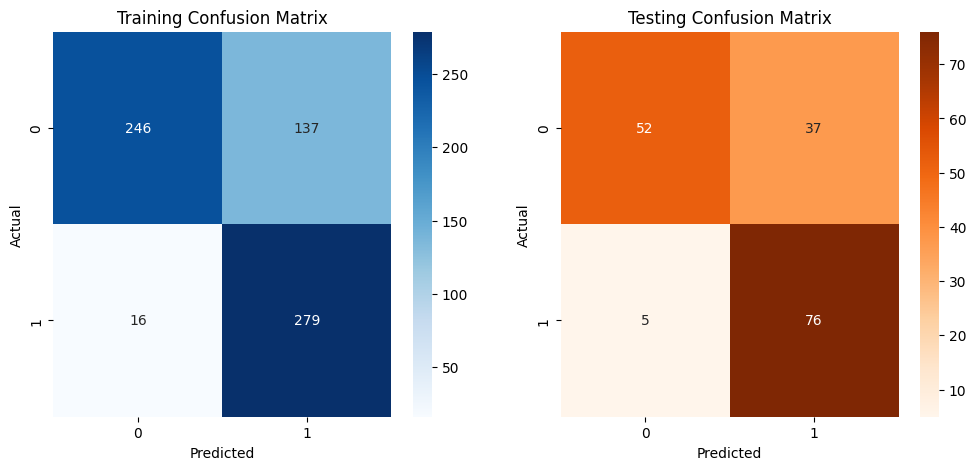

Training Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.64      0.76       383
           1       0.67      0.95      0.78       295

    accuracy                           0.77       678
   macro avg       0.80      0.79      0.77       678
weighted avg       0.82      0.77      0.77       678

Testing Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.58      0.71        89
           1       0.67      0.94      0.78        81

    accuracy                           0.75       170
   macro avg       0.79      0.76      0.75       170
weighted avg       0.80      0.75      0.75       170

Training Accuracy: 0.7743

Testing Accuracy: 0.7529

Model is well-generalized (Regular Fit)

2) Calculate MSE, RMSE, MAPE and R2 scores for the price prediction exercise done in Lab 02.
Analyse the results.

In [1]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score
import numpy as np

C = np.array([386, 289, 393, 110, 280, 167, 271, 274, 148, 198])
C_predicted = np.array([386, 289, 393, 110, 280, 167, 271, 274, 148, 198])

mse = mean_squared_error(C, C_predicted)

rmse = np.sqrt(mse)

mape = mean_absolute_percentage_error(C, C_predicted)

r2 = r2_score(C, C_predicted)

print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"MAPE: {mape}")
print(f"R2 Score: {r2}")

MSE: 0.0
RMSE: 0.0
MAPE: 0.0
R2 Score: 1.0


 The zero MSE/RMSE and 100% R2 indicate that the model's predictions perfectly match the actual values.

3) Generate 20 data points (training set data) consisting of 2 features (X & Y) whose values vary
randomly between 1 & 10. Based on the values, assign these 20 points to 2 different classes (class0 -
Blue & class1 – Red). Make a scatter plot of the training data and color the points as per their class
color. Observe the plot.

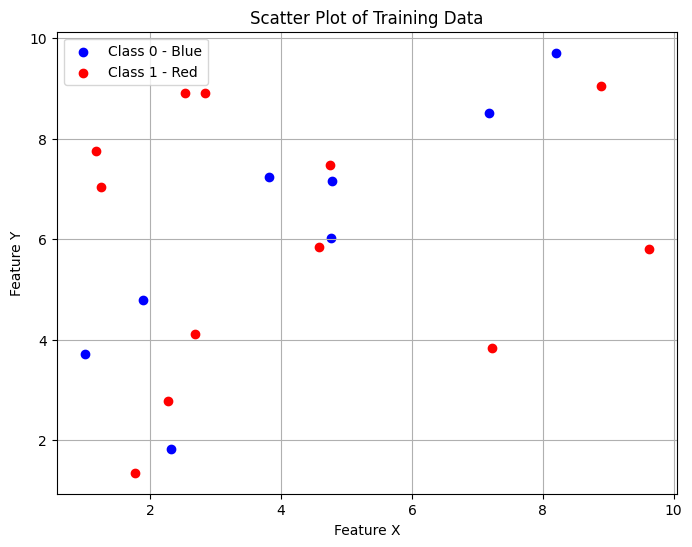

In [2]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(1)

data = np.random.uniform(1, 10, (20, 2))

labels = np.random.choice([0, 1], size=20)

class0_data = data[labels == 0]
class1_data = data[labels == 1]

plt.figure(figsize=(8, 6))
plt.scatter(class0_data[:, 0], class0_data[:, 1], color='blue', label='Class 0 - Blue')
plt.scatter(class1_data[:, 0], class1_data[:, 1], color='red', label='Class 1 - Red')
plt.title('Scatter Plot of Training Data')
plt.xlabel('Feature X')
plt.ylabel('Feature Y')
plt.legend()
plt.grid(True)
plt.show()

4) Generate test set data with values of X & Y varying between 0 and 10 with increments of 0.1.
This creates a test set of about 10,000 points. Classify these points with above training data using
kNN classifier (k = 3). Make a scatter plot of the test data output with test points colored as per their
predicted class colors (all points predicted class0 are labeled blue color). Observe the color spread
and class boundary lines in the feature space.

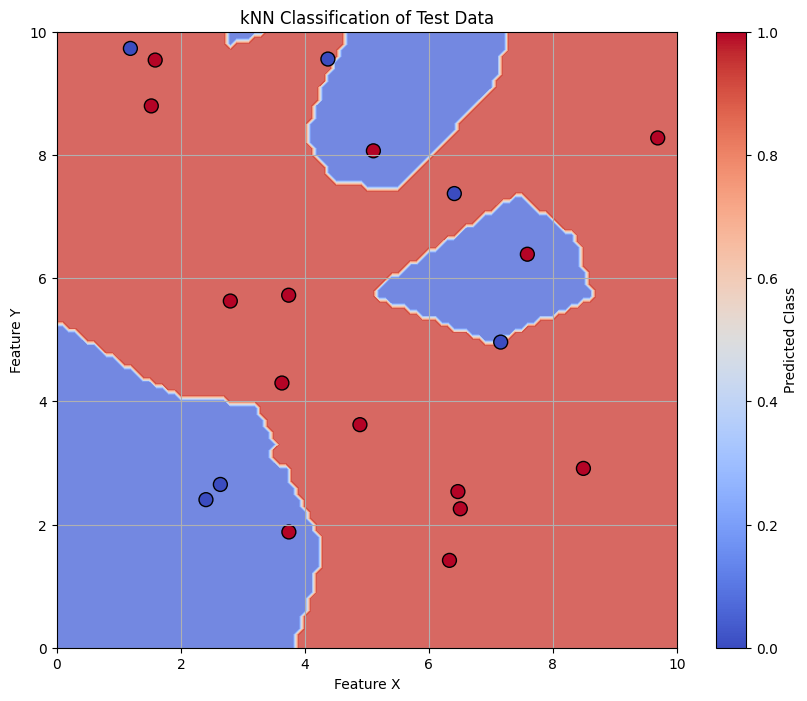

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
import itertools

np.random.seed(42)

train_data = np.random.uniform(1, 10, (20, 2))
train_labels = np.random.choice([0, 1], size=20)

x_test = np.arange(0, 10.1, 0.1)
y_test = np.arange(0, 10.1, 0.1)
xx, yy = np.meshgrid(x_test, y_test)
test_data = np.c_[xx.ravel(), yy.ravel()]

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(train_data, train_labels)

predicted_labels = knn.predict(test_data)

predicted_labels = predicted_labels.reshape(xx.shape)

plt.figure(figsize=(10, 8))
plt.contourf(xx, yy, predicted_labels, alpha=0.8, cmap='coolwarm')
plt.scatter(train_data[:, 0], train_data[:, 1], c=train_labels, edgecolor='k', s=100, cmap='coolwarm')
plt.title('kNN Classification of Test Data')
plt.xlabel('Feature X')
plt.ylabel('Feature Y')
plt.colorbar(label='Predicted Class')
plt.grid(True)
plt.show()

5) Repeat A4 exercise for various values of k and observe the change in the class boundary lines.

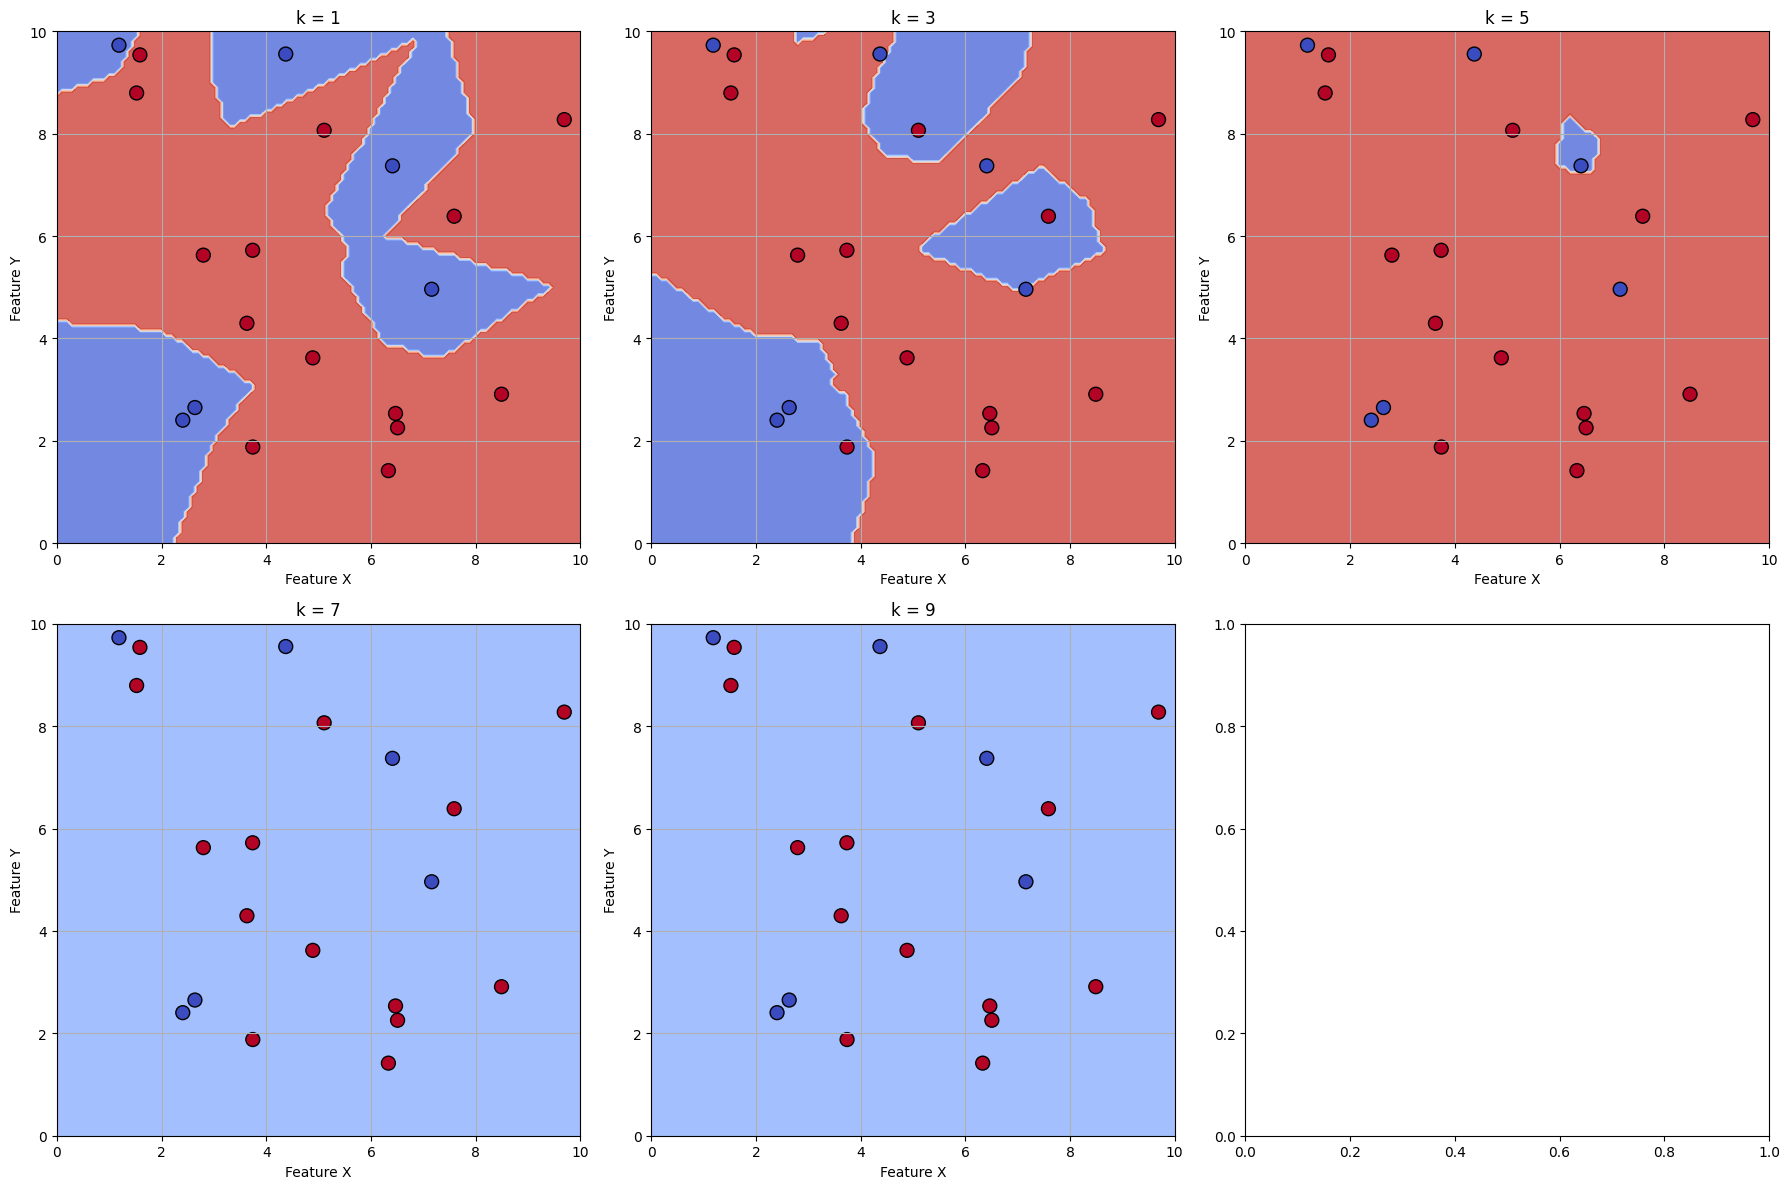

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

np.random.seed(42)

train_data = np.random.uniform(1, 10, (20, 2))
train_labels = np.random.choice([0, 1], size=20)

x_test = np.arange(0, 10.1, 0.1)
y_test = np.arange(0, 10.1, 0.1)
xx, yy = np.meshgrid(x_test, y_test)
test_data = np.c_[xx.ravel(), yy.ravel()]

k_values = [1, 3, 5, 7, 9]

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 12))
axes = axes.flatten()

for i, k in enumerate(k_values):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(train_data, train_labels)

    predicted_labels = knn.predict(test_data)
    predicted_labels = predicted_labels.reshape(xx.shape)

    ax = axes[i]
    ax.contourf(xx, yy, predicted_labels, alpha=0.8, cmap='coolwarm')
    ax.scatter(train_data[:, 0], train_data[:, 1], c=train_labels, edgecolor='k', s=100, cmap='coolwarm')
    ax.set_title(f'k = {k}')
    ax.set_xlabel('Feature X')
    ax.set_ylabel('Feature Y')
    ax.grid(True)

plt.tight_layout()
plt.show()

6) Repeat the exercises A3 to A5 for your project data considering any two features and classes.

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

# ----- Load the Provided Data -----
# Replace 'data.csv' with the actual file path or load method if different.
df = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/ML_PROJECT/DWI_with_Labels.xlsx")

# Display the first few rows to verify the data
print(df.head())

   0         1         2         3         4         5         6         7  \
0  0  0.000000  0.012268  0.003266  0.000291  0.004281  0.488672  0.052669   
1  0  0.000000  0.056512  0.002027  0.000000  0.009127  1.006367  0.141355   
2  0  0.000000  0.001792  0.000000  0.000000  0.002122  0.670452  0.090060   
3  0  0.000000  0.019131  0.000667  0.000837  0.001091  1.990237  0.142952   
4  0  0.000724  0.005138  0.003321  0.000000  0.006206  0.825083  0.042853   

          8         9  ...      6715      6716      6717      6718      6719  \
0  0.010826  0.013919  ...  0.030331  0.066913  0.277194  1.711563  0.733845   
1  0.016826  0.002914  ...  0.116575  0.043025  0.297887  1.210289  0.742715   
2  0.000233  0.005707  ...  0.052179  0.027521  0.200958  1.020037  0.468996   
3  0.002984  0.015631  ...  0.034361  0.035400  0.090920  1.036043  0.481775   
4  0.014318  0.036701  ...  0.095915  0.057068  0.143459  0.972968  0.936739   

       6720      6721      6722  6723  Label  
0  

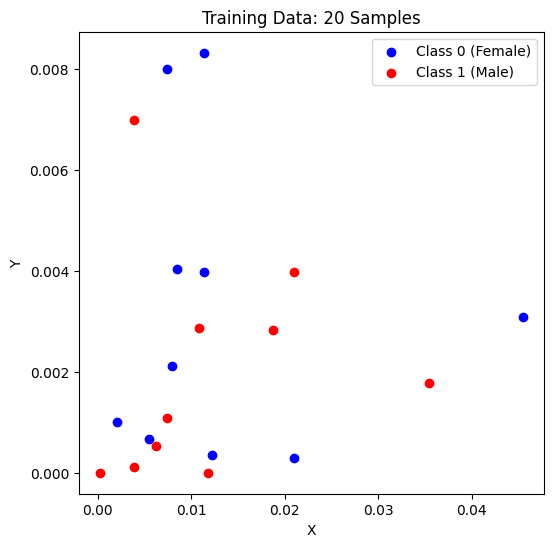

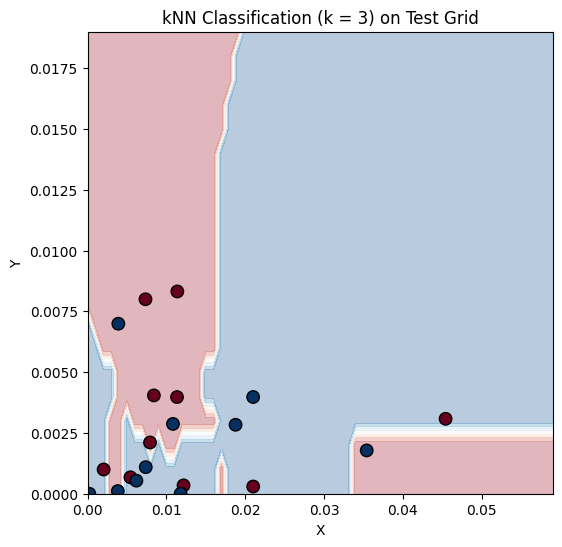

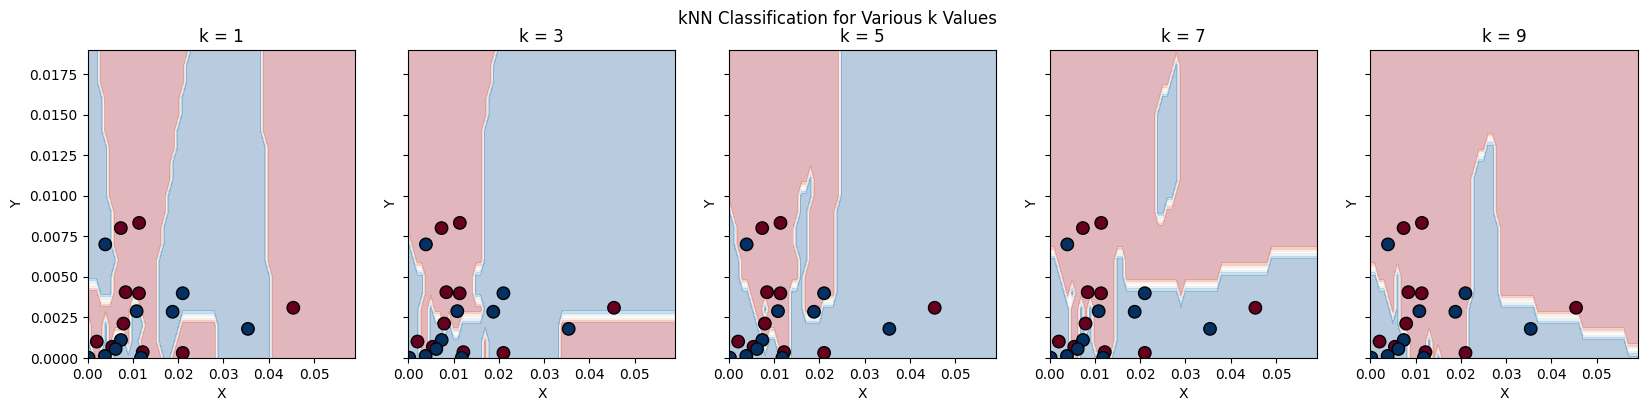

In [22]:
# ----- A3: Select 20 Samples (Training Data) -----
# To ensure both classes (female: 0, male: 1) are represented, sample 10 from each.
sample_female = df[df['Label'] == 0].sample(n=10, random_state=42)
sample_male   = df[df['Label'] == 1].sample(n=10, random_state=42)
training_data = pd.concat([sample_female, sample_male])
fx = 9
fy = 10
# Extract features (X and Y) and labels from the training set.
X_train = training_data[[fx, fy]].values
y_train = training_data['Label'].values

# Plot the training data points
plt.figure(figsize=(6, 6))
colors = {0: 'blue', 1: 'red'}
for label in np.unique(y_train):
    subset = training_data[training_data['Label'] == label]
    plt.scatter(subset[fx], subset[fy], color=colors[label],
                label=f'Class {label} ({"Female" if label==0 else "Male"})')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Training Data: 20 Samples')
plt.legend()
plt.show()

# ----- A4: kNN Classification (k = 3) on Test Grid -----
# Generate a test grid: X and Y values vary from 0 to 10 in increments of 0.1.
x_min, x_max = 0, 0.06
y_min, y_max = 0, 0.02
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.001),
                     np.arange(y_min, y_max, 0.001))
X_test = np.c_[xx.ravel(), yy.ravel()]

# Initialize and train the kNN classifier with k = 3.
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_test_pred = knn.predict(X_test)

# Reshape predictions back into grid shape.
Z = y_test_pred.reshape(xx.shape)

# Plot the decision boundary along with the training data.
plt.figure(figsize=(6, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.RdBu)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.RdBu,
            edgecolor='k', s=80)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('kNN Classification (k = 3) on Test Grid')
plt.show()

# ----- A5: kNN Classification for Various k Values -----
# List of different k values to explore.
ks = [1, 3, 5, 7, 9]

# Create subplots to compare the decision boundaries.
fig, axes = plt.subplots(1, len(ks), figsize=(20, 4), sharex=True, sharey=True)

for ax, k in zip(axes, ks):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_test_pred = knn.predict(X_test)
    Z = y_test_pred.reshape(xx.shape)

    # Plot the decision boundary for the given k.
    ax.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.RdBu)
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.RdBu,
               edgecolor='k', s=80)
    ax.set_title(f'k = {k}')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')

plt.suptitle('kNN Classification for Various k Values')
plt.show()

7) Use RandomSearchCV() or GridSearchCV() operations to find the ideal ‘k’ value for your
kNN classifier. This is called hyper-parameter tuning.

In [8]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, train_test_split

np.random.seed(42)

train_data = np.random.uniform(1, 10, (20, 2))
train_labels = np.random.choice([0, 1], size=20)

X_train, X_val, y_train, y_val = train_test_split(train_data, train_labels, test_size=0.2, random_state=42)

knn = KNeighborsClassifier()

param_grid = {'n_neighbors': list(range(1, 21, 2))}

grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, scoring='accuracy')

grid_search.fit(X_train, y_train)

best_k = grid_search.best_params_['n_neighbors']
best_score = grid_search.best_score_

print(f"Best k value: {best_k}")
print(f"Best validation accuracy: {best_score:.4f}")

best_knn = grid_search.best_estimator_
val_accuracy = best_knn.score(X_val, y_val)
print(f"Validation accuracy with best k: {val_accuracy:.4f}")

Best k value: 1
Best validation accuracy: 0.7500
Validation accuracy with best k: 0.2500


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:960: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 949, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_scorer.py", line 288, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_scorer.py", line 380, in _score
    y_pred = method_caller(
             ^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_scorer.py", line 90, in _cached_call
   